In [77]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 
import scipy.stats as stats 

from scipy.stats.mstats import winsorize 
from sqlalchemy import create_engine 
from sqlalchemy.engine.url import URL

import warnings 

warnings.filterwarnings("ignore")
plt.style.use("default")
sns.set(style="whitegrid")

In [78]:
kagle = dict(
    drivername="postgresql",
    username="dsbc_student",
    password="7*.8G9QH21",
    host="142.93.121.174",
    port="5432",
    database="youtube"
)

engine = create_engine(URL(**kagle), echo=True)

youtube_df = pd.read_sql_query("SELECT * FROM youtube", con=engine)

engine.dispose()

2019-11-22 13:40:30,248 INFO sqlalchemy.engine.base.Engine select version()
2019-11-22 13:40:30,249 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:30,350 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-22 13:40:30,352 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:30,454 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-22 13:40:30,456 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:30,505 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-22 13:40:30,507 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:30,556 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-22 13:40:30,557 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:30,653 INFO sqlalchemy.engine.base.Engine SELECT * FROM youtube
2019-11-22 13:40:30,654 INFO sqlalchemy.engine.base.Engine {}


In [79]:
# Deal with the missing values
youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)
youtube_df["Video Uploads"] = pd.to_numeric(youtube_df["Video Uploads"], downcast="float")

youtube_df["Subscribers"] = youtube_df["Subscribers"].apply(str.strip).replace("--", np.nan)
youtube_df["Subscribers"] = pd.to_numeric(youtube_df["Subscribers"], downcast="float")

youtube_df["Grade"] = youtube_df["Grade"].apply(str.strip).replace("",np.nan)

youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)

In [80]:
"""
    Apply a one-way winsorization to the highest end of the value distribution.  There a lot of extreme values, so set the value of the outliers to the value of the 90th percentile.
"""
youtube_df["winsorized_uploads"] = winsorize(youtube_df["Video Uploads"], (0, 0.10))
youtube_df["winsorized_subscribers"] = winsorize(youtube_df["Subscribers"], (0,0.10))
youtube_df["winsorized_views"] = winsorize(youtube_df["Video views"], (0,0.10))

for i in range(0,len(youtube_df["Grade"])):
    if pd.isnull(youtube_df["Grade"][i]):
        youtube_df["Grade"][i] = youtube_df["Grade"][i-1]

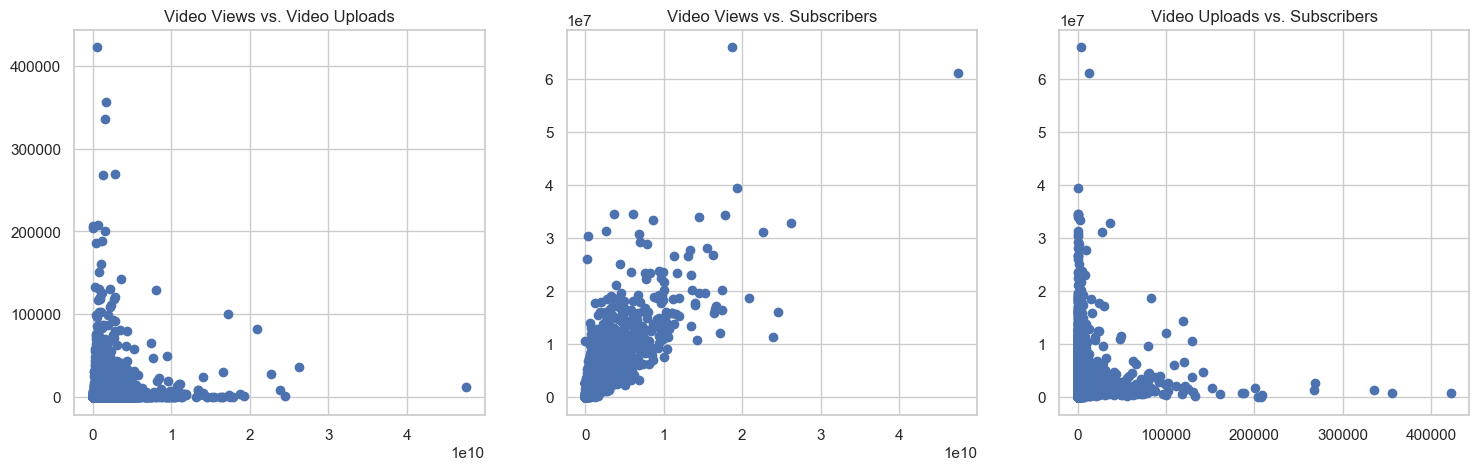

In [81]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(youtube_df["Video views"], youtube_df["Video Uploads"])
plt.title("Video Views vs. Video Uploads")

plt.subplot(1,3,2)
plt.scatter(youtube_df["Video views"], youtube_df["Subscribers"])
plt.title("Video Views vs. Subscribers")

plt.subplot(1,3,3)
plt.scatter(youtube_df["Video Uploads"], youtube_df["Subscribers"]) 
plt.title("Video Uploads vs. Subscribers")

plt.show();

In [82]:
"""
    Change gears and look at the relationship betweeen different pairs of student test scores.
"""
kagle2 = dict(
    drivername="postgresql",
    username="dsbc_student",
    password="7*.8G9QH21",
    host="142.93.121.174",
    port="5432",
    database="studentsperformance"
)

engine = create_engine(URL(**kagle2), echo=True)

student_df = pd.read_sql_query("SELECT * FROM studentsperformance", con=engine)

engine.dispose()

2019-11-22 13:40:49,965 INFO sqlalchemy.engine.base.Engine select version()
2019-11-22 13:40:49,968 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:50,074 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-22 13:40:50,075 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:50,177 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-22 13:40:50,179 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:50,230 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-22 13:40:50,232 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:50,283 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-22 13:40:50,286 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 13:40:50,386 INFO sqlalchemy.engine.base.Engine SELECT * FROM studentsperformance
2019-11-22 13:40:50,388 INFO sqlalchemy.engine.base.Engine {}


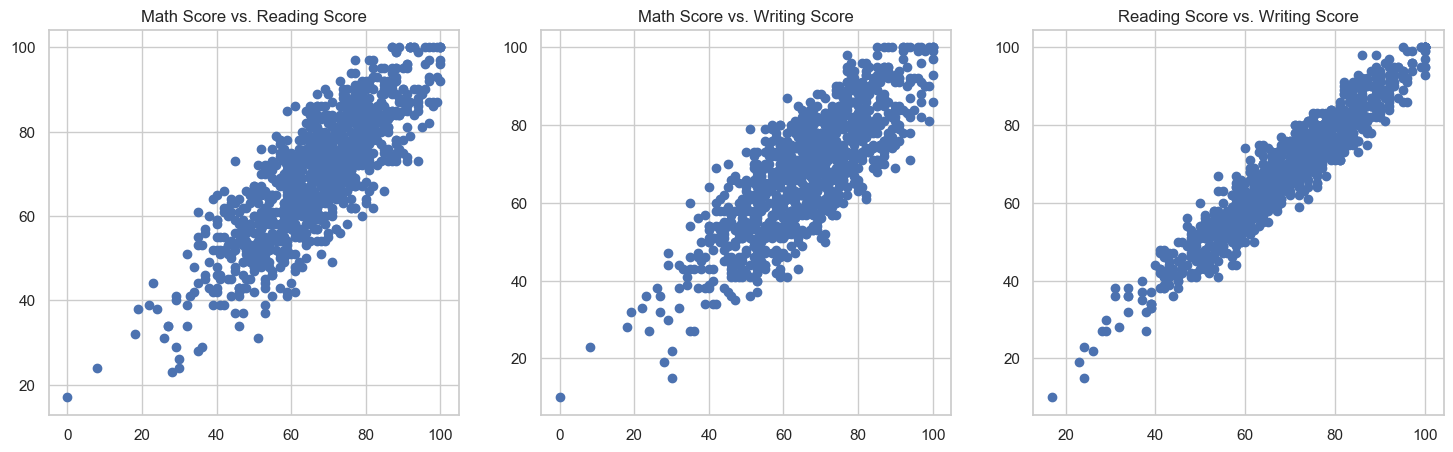

In [83]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(student_df["math score"], student_df["reading score"])
plt.title("Math Score vs. Reading Score")

plt.subplot(1,3,2)
plt.scatter(student_df["math score"], student_df["writing score"])
plt.title("Math Score vs. Writing Score")

plt.subplot(1,3,3)
plt.scatter(student_df["reading score"], student_df["writing score"])
plt.title("Reading Score vs. Writing Score")

plt.show()

"""
    Note on outliers: There is also another type of outlier, called a two-dimensional outlier, that represents unusual combinations of values. If you look at the scatterplots below carefully, you may notice some of those unusual value pairs. To deal with these, you can apply one of the techniques explained in the outliers checkpoint.
""";

In [84]:
"""
    The correlation coefficient (r) is a numeric representation of the linear relationship between 2 continuous variables. Correlations range from -1 (a perfect negative relationship: as values in 1 variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (a perfect positive relationship: as values in 1 variable go up, values in the other go up as well).
"""
# Generate a correlation matrix for youtube_df
youtube_df.corr()

,Video Uploads,Subscribers,Video views,winsorized_uploads,winsorized_subscribers,winsorized_views
Video Uploads,1.000000,0.011329,0.092423,0.473634,0.012593,0.134971
Subscribers,0.011329,1.000000,0.784449,0.082880,0.778046,0.626605
Video views,0.092423,0.784449,1.000000,0.219291,0.578920,0.700070
winsorized_uploads,0.473634,0.082880,0.219291,1.000000,0.097699,0.307744
winsorized_subscribers,0.012593,0.778046,0.578920,0.097699,1.000000,0.743256
winsorized_views,0.134971,0.626605,0.700070,0.307744,0.743256,1.000000


In [85]:
# Generate a correlation matrix for student_df
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


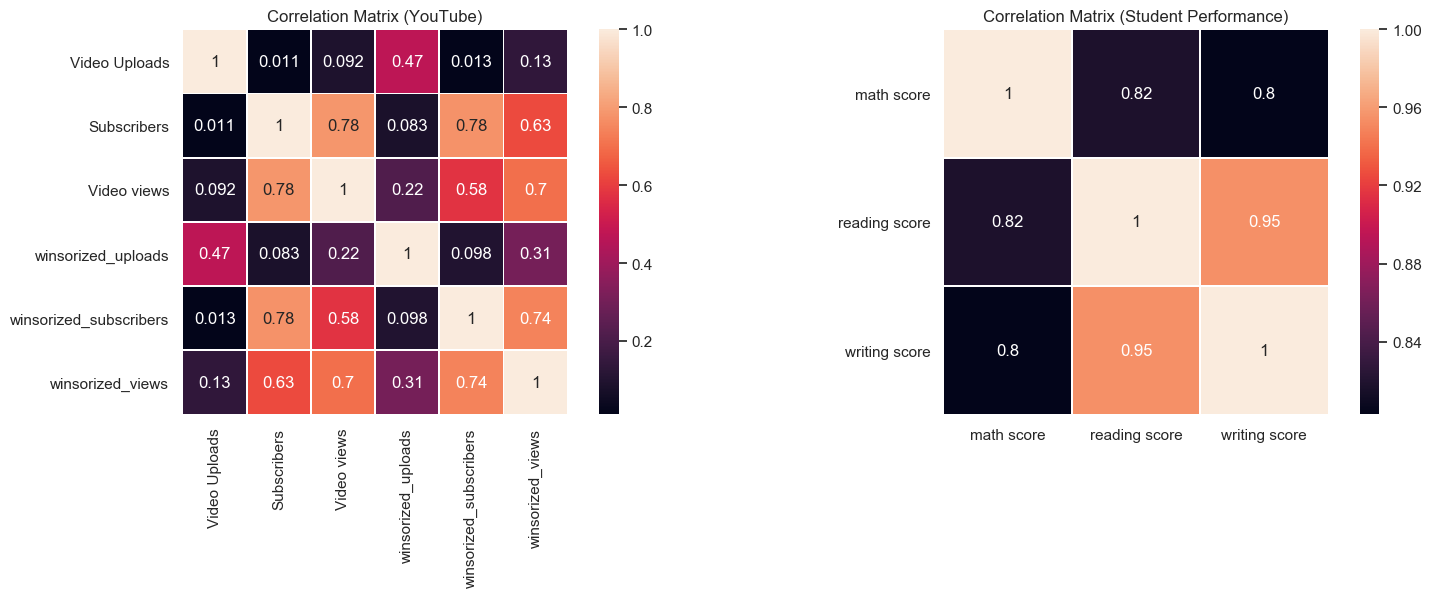

In [86]:
# View the correlation matricies as heatmaps
corrmat_youtube = youtube_df.corr()
corrmat_student = student_df.corr()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(corrmat_youtube, square=True, annot=True, linewidths=0.5)
plt.title("Correlation Matrix (YouTube)")
# Fix display issues for this version of matplotlib
b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
# plt.yticks(rotation=360)

plt.subplot(1,2,2)
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=0.5)
plt.title("Correlation Matrix (Student Performance)")
# Fix display issues for this version of matplotlib
b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.yticks(rotation=360)

plt.show();

In [18]:
"""
    Bivariate analysis of a continuous-categorical pair:  When you analyze a continuous and a categorical variable pair, you usually look at some metric of the continuous variable for each value of the categorical value.  If you observe different values accross categories, then this implies the categorical variable has some important information regarding the continuous variable.
"""
# Derive averages by group
youtube_df.groupby("Grade").mean()

,Video Uploads,Subscribers,Video views,winsorized_uploads,winsorized_subscribers,winsorized_views
Grade,,,,,,
A,5353.923340,4.931878e+06,2.356715e+09,1675.311890,3398754.5,1.447002e+09
A+,16547.927734,1.150483e+07,6.053121e+09,2729.877930,5061679.0,2.088445e+09
A++,37450.699219,2.228176e+07,2.119909e+10,4673.700195,5590006.0,2.468241e+09
A-,4136.514648,2.784051e+06,1.041149e+09,1319.476562,2329109.5,8.810693e+08
B+,2987.168457,1.620060e+06,5.259158e+08,1120.130737,1513429.0,5.085668e+08


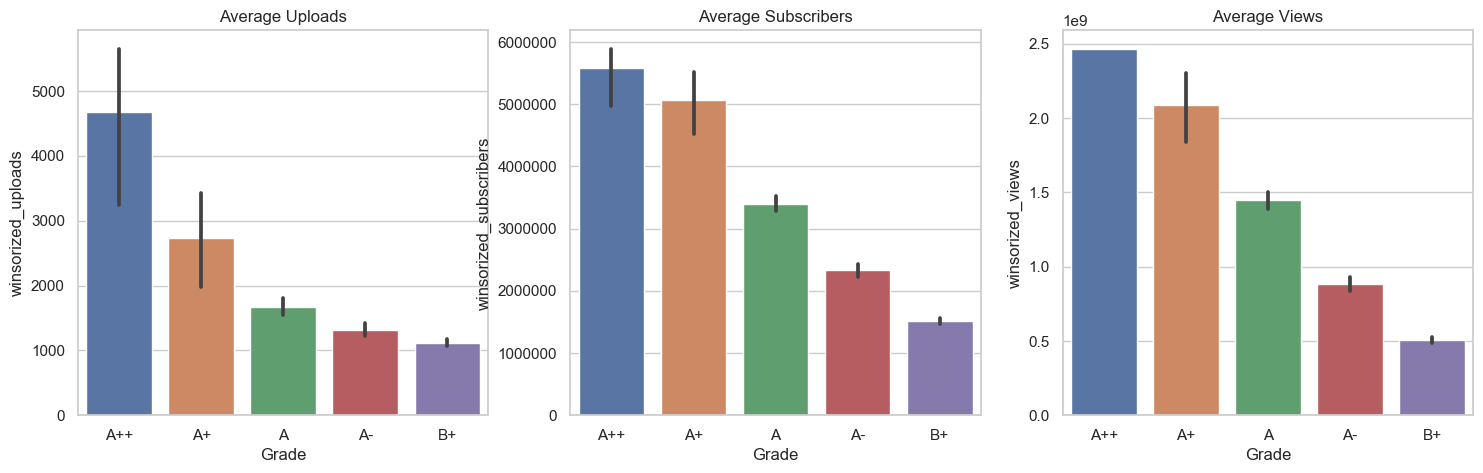

In [19]:
"""
    You can also use visualization to analyze continuous and categorical variable pairs.  
"""
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(youtube_df["Grade"], youtube_df["winsorized_uploads"])
plt.title("Average Uploads")

plt.subplot(1,3,2)
sns.barplot(youtube_df["Grade"], youtube_df["winsorized_subscribers"])
plt.title("Average Subscribers")

plt.subplot(1,3,3)
sns.barplot(youtube_df["Grade"], youtube_df["winsorized_views"])
plt.title("Average Views")

plt.show();

In [20]:
"""
    Visualizing differences is not a formal way of stating that there are signifigant differences across categories.  For that you need to use a statistical test such as a t-test or ANOVA.
"""
# Use a t-test to determine statistical signifigance
grades = youtube_df["Grade"].unique()
grouped_df = youtube_df.groupby("Grade")
for var in ["winsorized_uploads", "winsorized_subscribers", "winsorized_views"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0,len(grades)):
        for j in range(i+1, len(grades)):
            print(f"t-test between groups {grades[i]} and {grades[j]}")
            print(stats.ttest_ind(
                youtube_df[youtube_df["Grade"]==grades[i]][var], 
                youtube_df[youtube_df["Grade"]==grades[j]][var]
            ))

------------------------------------------------
Comparisons for variable: winsorized_uploads
------------------------------------------------
t-test between groups A++ and A+
Ttest_indResult(statistic=2.3701079407396466, pvalue=0.021763510628877547)
t-test between groups A++ and A
Ttest_indResult(statistic=4.635430579419143, pvalue=4.046912486918512e-06)
t-test between groups A++ and A-
Ttest_indResult(statistic=5.849570829755956, pvalue=6.610430711945347e-09)
t-test between groups A++ and B+
Ttest_indResult(statistic=6.895263475627788, pvalue=6.542432119894545e-12)
t-test between groups A+ and A
Ttest_indResult(statistic=3.226986347537072, pvalue=0.0012914866839059097)
t-test between groups A+ and A-
Ttest_indResult(statistic=4.847071421048167, pvalue=1.4393742004398387e-06)
t-test between groups A+ and B+
Ttest_indResult(statistic=6.2504538443070645, pvalue=4.672660044879273e-10)
t-test between groups A and A-
Ttest_indResult(statistic=4.134406909072197, pvalue=3.7067387370056777e-0

In [ ]:
"""
    Bivariate analysis of two categorical varibles: Since categorical variables take a limited number of different values by definition, the most common technique used is the observation count of all value pairs.
"""


In [21]:
# Print the first few observations
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
# Create a crosstab: gender by race/ethnicity
count_table = pd.crosstab(student_df["gender"], student_df["race/ethnicity"])
count_table

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


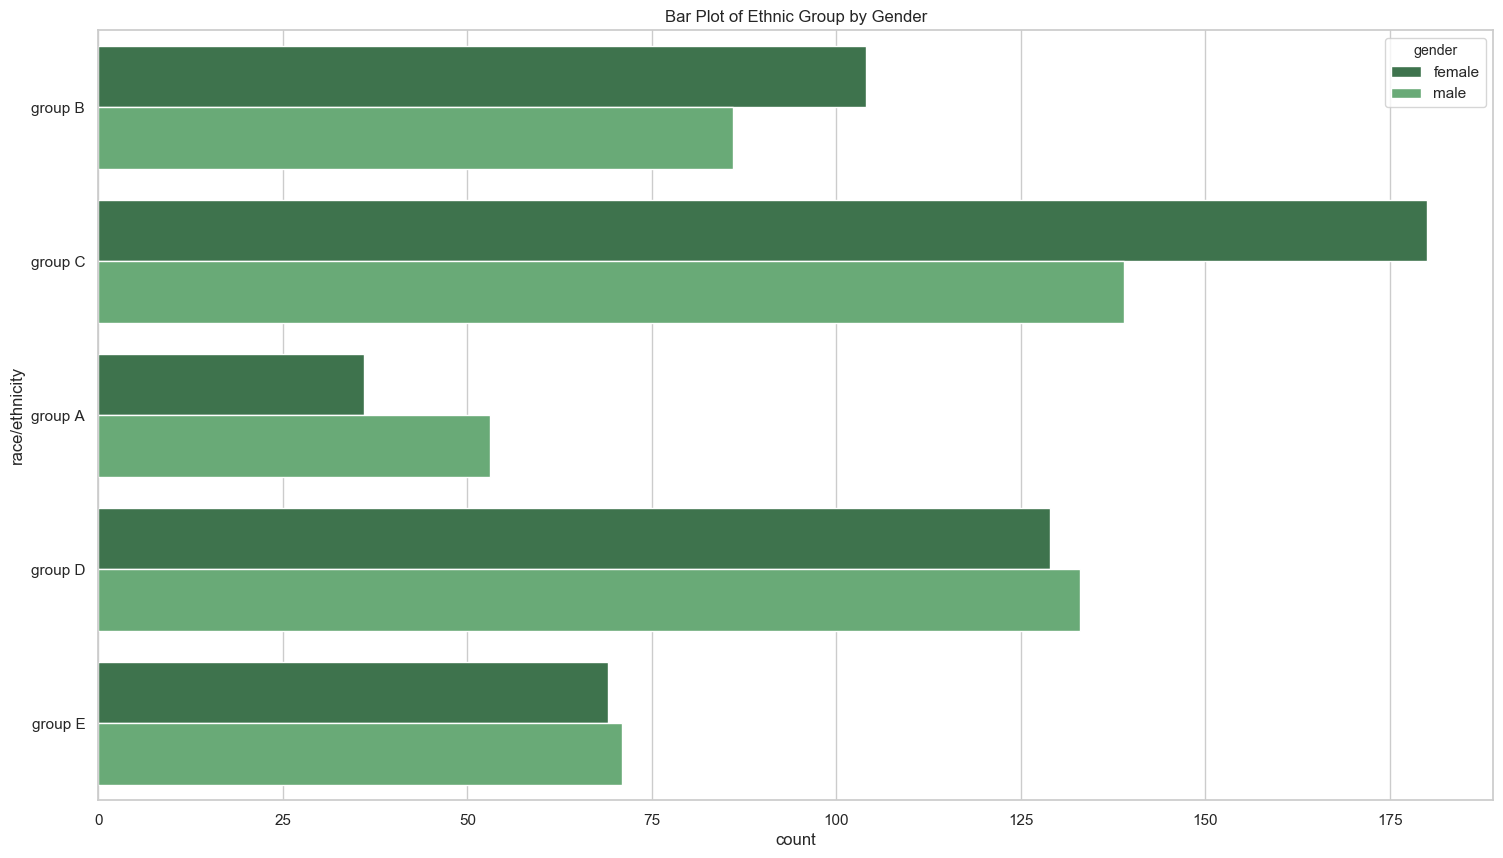

In [25]:
"""
    Visualize the count_table with a bar plot to help visualize the differences.  The bar plot uses the height of each bar to indicate and number of datapoints in each combination of the variables.
"""
plt.figure(figsize=(18,10))

sns.countplot(y="race/ethnicity", hue="gender", data=student_df, palette="Greens_d")
plt.title("Bar Plot of Ethnic Group by Gender")

plt.show()

In [28]:
"""
    Buttress the visualization above with a statistical test.  Use a Chi-squared test to indicate wether one combination of variables is significantly different than the others.

    The test will return a chi-square test statistic and a p-value.  Like the t-test, the chi-square is compared against a distribution (the chi-squar distribution) to determine wether the group size differences are large enough to reflect differences in the population.

    A note on small groups: Similar to how unusual two-dimensional datapoints could skew our analysis, groups with very small variances relative to other groups and groups with a very small number of observations can also mislead us. Hence, we should keep in mind interpreting the differences for small groups should be done cautiously.    
"""
print(stats.chisquare(count_table, axis=None))

# The result below points to a statistically signifigant test

Power_divergenceResult(statistic=181.70000000000002, pvalue=2.237210012745866e-34)


## Assignment

In [2]:
kagle3 = dict(
    drivername="postgresql",
    username="dsbc_student",
    password="7*.8G9QH21",
    host="142.93.121.174",
    port="5432",
    database="studentsperformance"
)

engine = create_engine(URL(**kagle3), echo=True)

student2_df = pd.read_sql_query("SELECT * FROM studentsperformance", con=engine)

engine.dispose()

2019-11-22 08:23:48,981 INFO sqlalchemy.engine.base.Engine select version()
2019-11-22 08:23:48,983 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,089 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-22 08:23:49,092 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,199 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-22 08:23:49,201 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,255 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-22 08:23:49,258 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,313 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-22 08:23:49,316 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,421 INFO sqlalchemy.engine.base.Engine SELECT * FROM studentsperformance
2019-11-22 08:23:49,425 INFO sqlalchemy.engine.base.Engine {}


### _1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?_

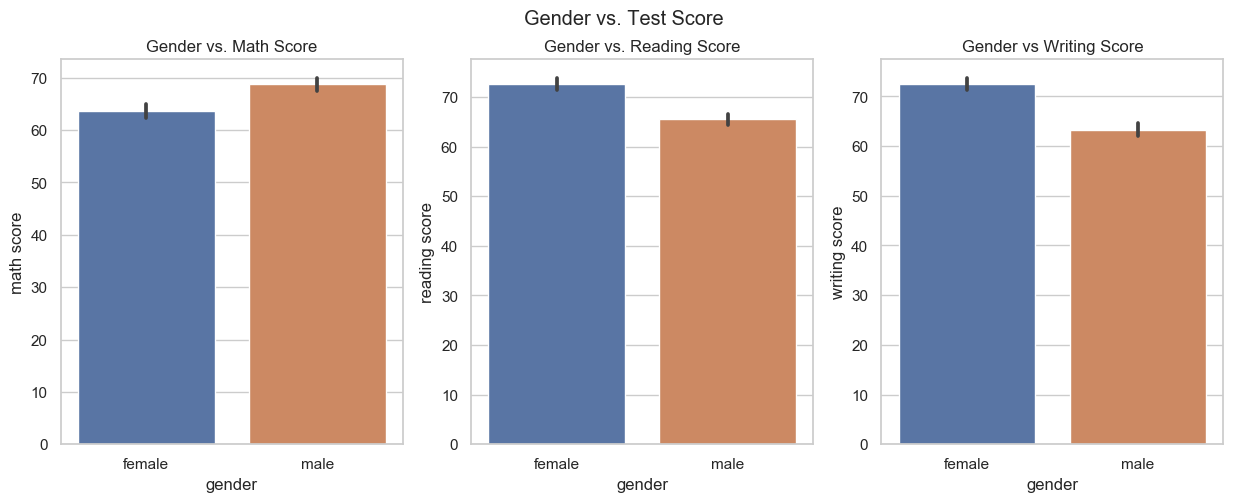

In [19]:
# Plotting Gender vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["gender"], student2_df["math score"])
plt.title("Gender vs. Math Score")

plt.subplot(1,3,2)
sns.barplot(student2_df["gender"], student2_df["reading score"])
plt.title("Gender vs. Reading Score")

plt.subplot(1,3,3)
sns.barplot(student2_df["gender"], student2_df["writing score"])
plt.title("Gender vs Writing Score")

plt.suptitle("Gender vs. Test Score")

plt.show();

In [4]:
"""
    This is a bivariate analysis of three categorical variables: gender, ethnicity, and parental level of education vs. the student scores in math, reading, and writing
"""
student2_df.groupby("gender").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [30]:
gender = student2_df["gender"].unique()
gender_grouped_df = student2_df.groupby("gender")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(gender)):
        for j in range(i+1, len(gender)):
            print(f"t-test between groups {gender[i]} and {gender[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["gender"]==gender[i]][category],
                student2_df[student2_df["gender"]==gender[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups female and male
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: reading score ::
t-test between groups female and male
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: writing score ::
t-test between groups female and male
Ttest_indResult(statistic=9.97955791000

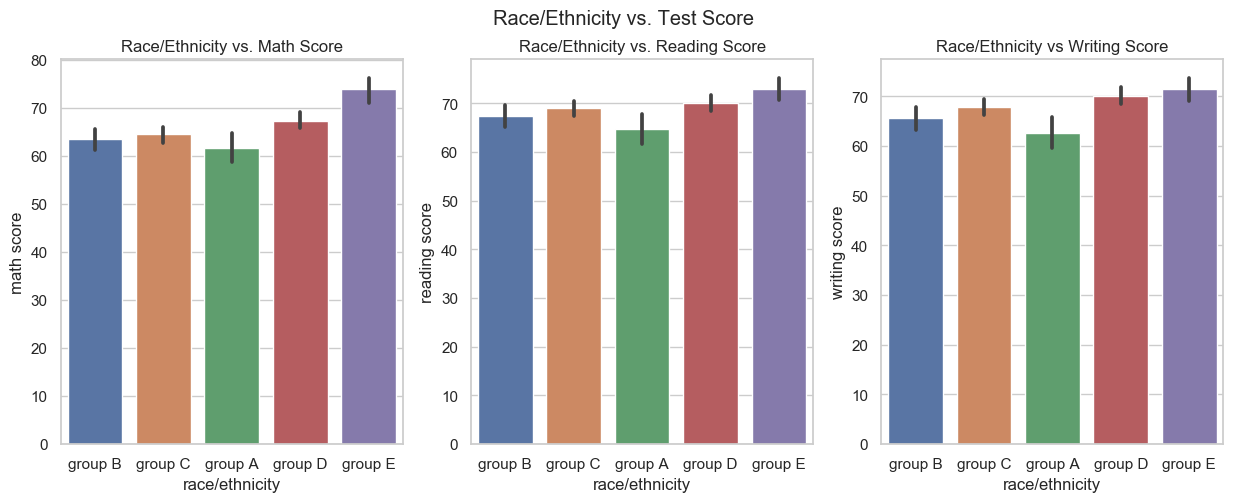

In [18]:
# Visualizing Race/Ethnicity vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["race/ethnicity"], student2_df["math score"])
plt.title("Race/Ethnicity vs. Math Score")

plt.subplot(1,3,2)
sns.barplot(student2_df["race/ethnicity"], student2_df["reading score"])
plt.title("Race/Ethnicity vs. Reading Score")

plt.subplot(1,3,3)
sns.barplot(student2_df["race/ethnicity"], student2_df["writing score"])
plt.title("Race/Ethnicity vs Writing Score")

plt.suptitle("Race/Ethnicity vs. Test Score")

plt.show();

In [10]:
student2_df.groupby("race/ethnicity").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [29]:
race_ethnicity = student2_df["race/ethnicity"].unique()
race_ethnicity_grouped_df = student2_df.groupby("race/ethnicity")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(race_ethnicity)):
        for j in range(i+1, len(race_ethnicity)):
            print(f"t-test between groups {race_ethnicity[i]} and {race_ethnicity[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["race/ethnicity"]==race_ethnicity[i]][category],
                student2_df[student2_df["race/ethnicity"]==race_ethnicity[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups group B and group C
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
                                                                                                                 
t-test between groups group B and group A
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
                                                                                                                 
t-test between groups group B and group D
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
                                                                                                                 
t-test between groups group B and group E
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
                                       

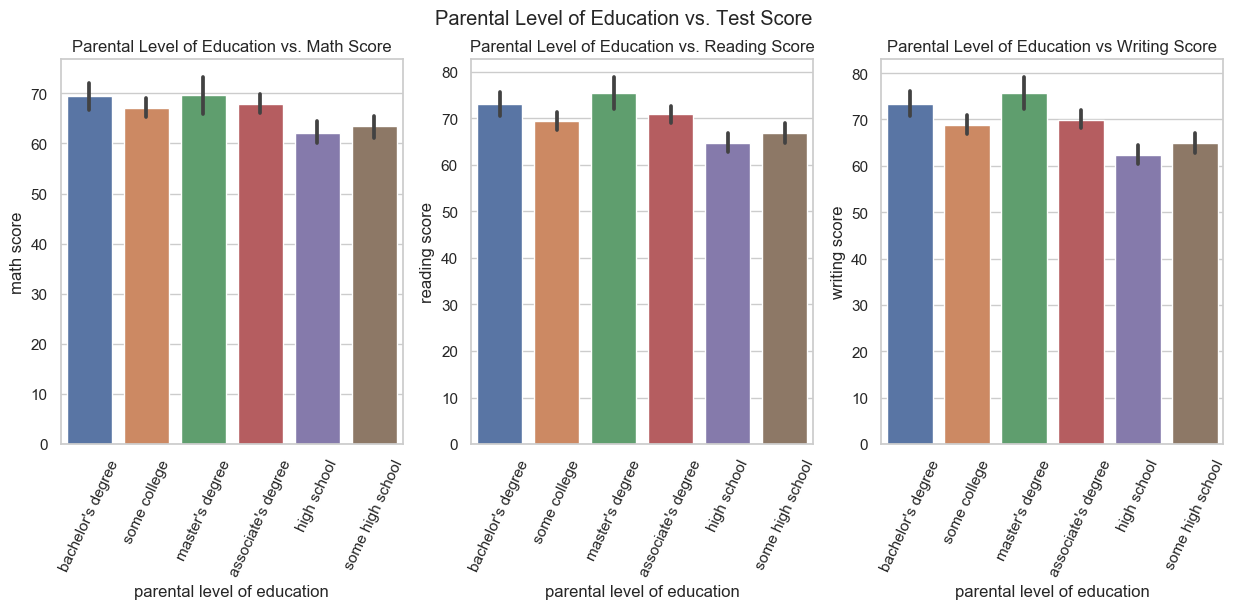

In [17]:
# Visualizing Parental Level of Education vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["parental level of education"], student2_df["math score"])
plt.title("Parental Level of Education vs. Math Score")
plt.xticks(rotation=65)

plt.subplot(1,3,2)
sns.barplot(student2_df["parental level of education"], student2_df["reading score"])
plt.title("Parental Level of Education vs. Reading Score")
plt.xticks(rotation=65)

plt.subplot(1,3,3)
sns.barplot(student2_df["parental level of education"], student2_df["writing score"])
plt.title("Parental Level of Education vs Writing Score")
plt.xticks(rotation=65)

plt.suptitle("Parental Level of Education vs. Test Score")

plt.show();

In [16]:
student2_df.groupby("parental level of education").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [28]:
parental_ed = student2_df["parental level of education"].unique()
parental_ed_grouped_df = student2_df.groupby("parental level of education")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(parental_ed)):
        for j in range(i+1, len(parental_ed)):
            print(f"t-test between groups {parental_ed[i]} and {parental_ed[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["parental level of education"]==parental_ed[i]][category],
                student2_df[student2_df["parental level of education"]==parental_ed[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups bachelor's degree and some college
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
                                                                                                                 
t-test between groups bachelor's degree and master's degree
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
                                                                                                                 
t-test between groups bachelor's degree and associate's degree
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
                                                                                                                 
t-test between groups bachelor's degree and high school
Ttest_indResult(statistic=4.236143622484822, 

#### _Conclusions_
Gender appears to have statistically significant impact regarding the reading score.  While the math and writing scores do not have the statistical relationship.  Race and Ethnicity as well as Parental Education Achievement have statistically significant relationships to Test Scores.


### _2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?_

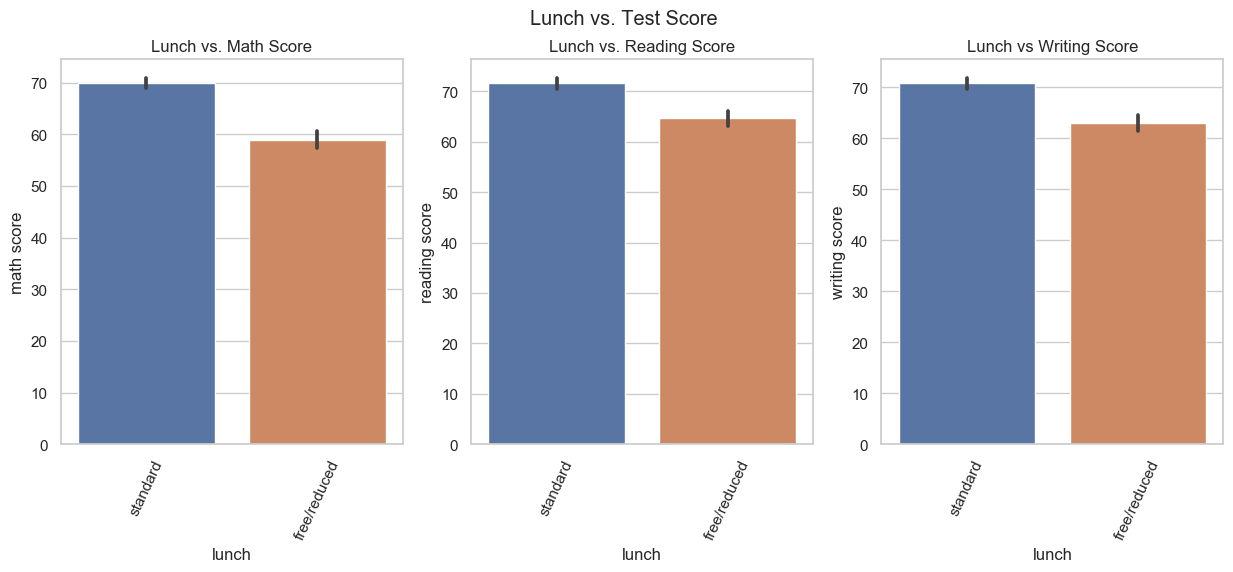

In [36]:
# Visualizing Lunch vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["lunch"], student2_df["math score"])
plt.title("Lunch vs. Math Score")
plt.xticks(rotation=65)

plt.subplot(1,3,2)
sns.barplot(student2_df["lunch"], student2_df["reading score"])
plt.title("Lunch vs. Reading Score")
plt.xticks(rotation=65)

plt.subplot(1,3,3)
sns.barplot(student2_df["lunch"], student2_df["writing score"])
plt.title("Lunch vs Writing Score")
plt.xticks(rotation=65)

plt.suptitle("Lunch vs. Test Score")

plt.show();

In [37]:
student2_df.groupby("lunch").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [39]:
lunch = student2_df["lunch"].unique()
lunch_grouped_df = student2_df.groupby("lunch")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(lunch)):
        for j in range(i+1, len(lunch)):
            print(f"t-test between groups {lunch[i]} and {lunch[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["lunch"]==lunch[i]][category],
                student2_df[student2_df["lunch"]==lunch[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups standard and free/reduced
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: reading score ::
t-test between groups standard and free/reduced
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: writing score ::
t-test between groups standard and free/reduced
Ttest_i

#### _Conclusions_
Lunches do not appear to have statistical relevance to Test Scores.


### _3. Does the test preparation course seem to have an effect on the exam performances?_

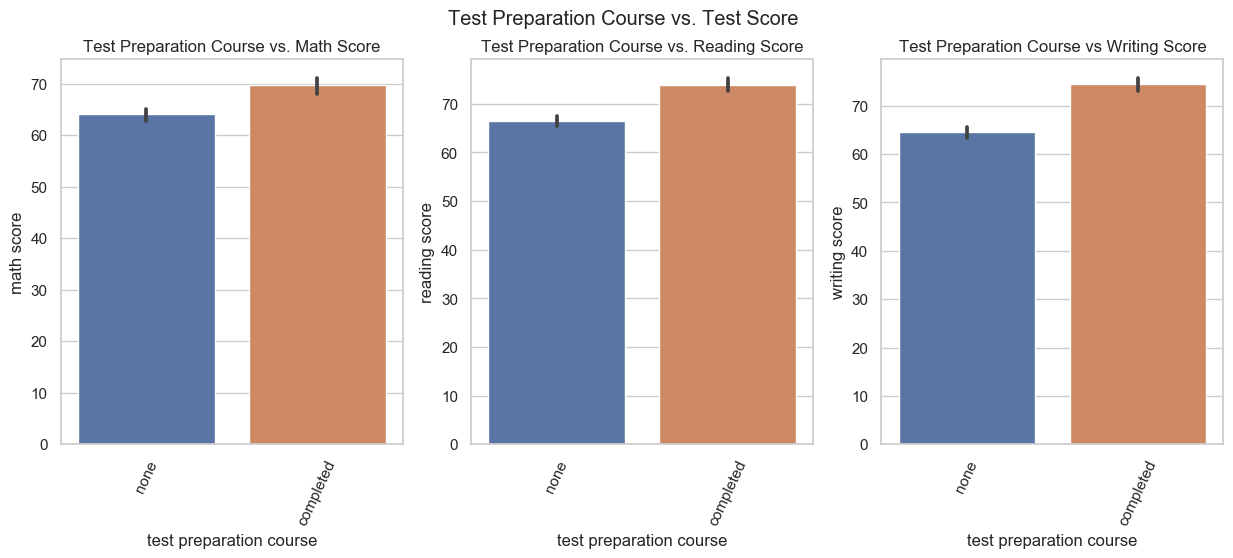

In [42]:
# Visualizing Test Preparation Course vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["test preparation course"], student2_df["math score"])
plt.title("Test Preparation Course vs. Math Score")
plt.xticks(rotation=65)

plt.subplot(1,3,2)
sns.barplot(student2_df["test preparation course"], student2_df["reading score"])
plt.title("Test Preparation Course vs. Reading Score")
plt.xticks(rotation=65)

plt.subplot(1,3,3)
sns.barplot(student2_df["test preparation course"], student2_df["writing score"])
plt.title("Test Preparation Course vs Writing Score")
plt.xticks(rotation=65)

plt.suptitle("Test Preparation Course vs. Test Score")

plt.show();

In [43]:
student2_df.groupby("test preparation course").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [44]:
test_prep = student2_df["test preparation course"].unique()
test_prep_grouped_df = student2_df.groupby("test preparation course")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(test_prep)):
        for j in range(i+1, len(test_prep)):
            print(f"t-test between groups {test_prep[i]} and {test_prep[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["test preparation course"]==test_prep[i]][category],
                student2_df[student2_df["test preparation course"]==test_prep[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups none and completed
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: reading score ::
t-test between groups none and completed
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: writing score ::
t-test between groups none and completed
Ttest_indResult(statistic=-1

#### _Conclusions_
Test Preparation Courses have a statistically significant relationship to Test Scores. 

### _4. Which 2 exam scores are most correlated with each other?_

math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


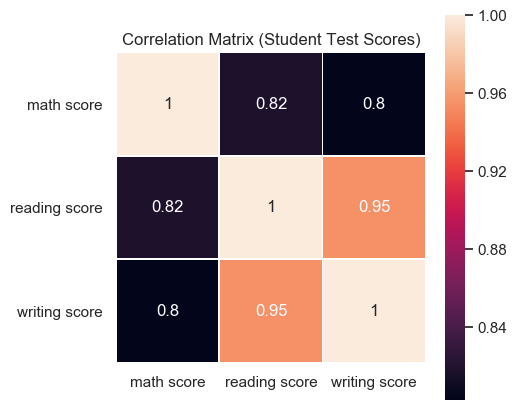

In [75]:
# Look for correlations in the student2 dataframe
test_corr = student2_df.corr()

print(test_corr)

plt.figure(figsize=(5,5))

plt.subplot(1,1,1)
sns.heatmap(test_corr, square=True, annot=True, linewidths=0.5)
# Fix display issues for this version of matplotlib
b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.yticks(rotation=360)

plt.title("Correlation Matrix (Student Test Scores)")

plt.show();

#### _Conclusions_
Reading and Writing Scores are the most tightly correlated.